## Load necessary libraries and allow Gdrive access

In [3]:
# Import required libraries 
import tensorflow as tf
import pandas as pd
import numpy as np
from random import seed
from random import randint
import matplotlib.pyplot as plt 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Load and standardize training, test and validation data sets

In [5]:
# Load training data
data = pd.read_csv('/content/drive/MyDrive/HW3/Q1_Train_Data.csv')

In [6]:
# Standardize training data 
print ("Standardizing train images...")
images = np.zeros((data.shape[0],48,48))
for i in range(data.shape[0]):
    images[i,:,:] = np.array(data.iloc[i,1].split()).astype(int).reshape((48,48))
images = tf.image.per_image_standardization(images)
print ("Standardizing train images...Ok")
print ("Flatten standardized train data...")
flatten_train_data = np.zeros((data.shape[0],48*48))
for i in range(data.shape[0]):
    flatten_train_data[i,:] = np.array(images[i,:,:]).flatten()
print ("Flatten standardized train data...Ok")

Standardizing train images...
Standardizing train images...Ok
Flatten standardized train data...
Flatten standardized train data...Ok


In [7]:
# Load test data 
testdata = pd.read_csv('/content/drive/MyDrive/HW3/Q1_Test_Data.csv')

In [8]:
# Standardize testing data 
print ("Standardizing test images...")
testimages = np.zeros((testdata.shape[0],48,48))
for i in range(testdata.shape[0]):
    testimages[i,:,:] = np.array(testdata.iloc[i,1].split()).astype(int).reshape((48,48))
testimages = tf.image.per_image_standardization(testimages)
print ("Standardizing test images...Ok")

print ("Flatten standardized test data...")
flatten_test_data = np.zeros((testdata.shape[0],48*48))
for i in range(testdata.shape[0]):
    flatten_test_data[i,:] = np.array(testimages[i,:,:]).flatten()
print ("Flatten standardized test data...Ok")

Standardizing test images...
Standardizing test images...Ok
Flatten standardized test data...
Flatten standardized test data...Ok


In [9]:
# Load validation data set
valdata = pd.read_csv('/content/drive/MyDrive/HW3/Q1_Validation_Data.csv')

In [10]:
# Standardize validation data 
print ("Standardizing validation images...")
valimages = np.zeros((valdata.shape[0],48,48))
for i in range(valdata.shape[0]):
    valimages[i,:,:] = np.array(valdata.iloc[i,1].split()).astype(int).reshape((48,48))
valimages = tf.image.per_image_standardization(valimages)
print ("Standardizing validation images...Ok")

print ("Flatten standardized validation data...")
flatten_val_data = np.zeros((valdata.shape[0],48*48))
for i in range(valdata.shape[0]):
    flatten_val_data[i,:] = np.array(valimages[i,:,:]).flatten()
print ("Flatten standardized validation data...Ok")

Standardizing validation images...
Standardizing validation images...Ok
Flatten standardized validation data...
Flatten standardized validation data...Ok


## Visualize training data set 

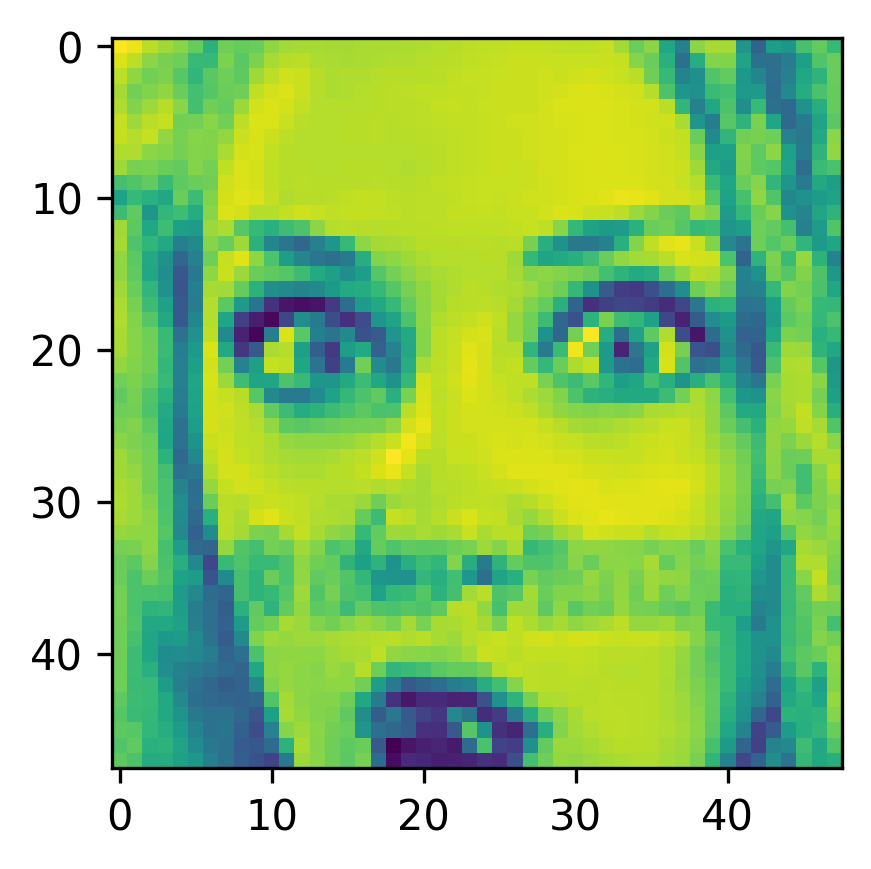

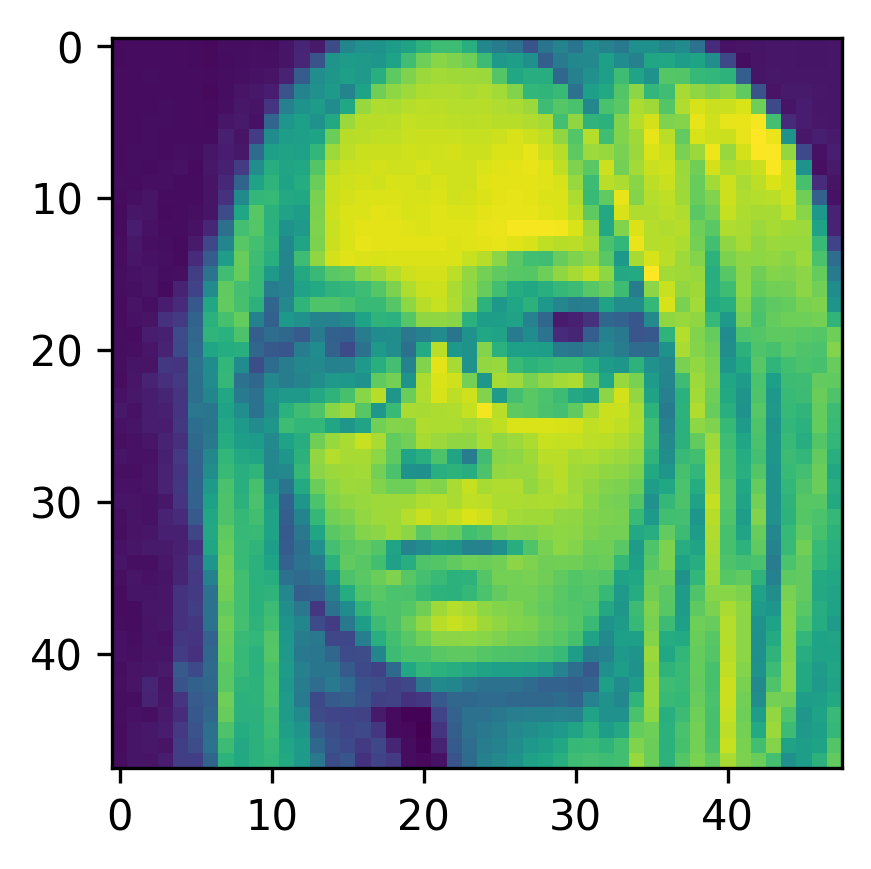

In [ ]:
# Pick and visualize two random images from training data set 
for i in range(2):
    imno = randint(0,data.shape[0])
    fig,ax = plt.subplots(1,1,dpi=300,figsize=[3,3])
    ax.imshow(images[imno,:,:])
    plt.tight_layout()
    plt.show()

## Count number of samples per emotion in the training data set

In [ ]:
# Count number of samples per emotion in the training sample 
typedict = {
    0:'Angry',
    1:'Disgust',
    2:'Fear',
    3:'Happy',
    4:'Sad',
    5:'Surprise',
    6:'Neutral',
}
types,counts = np.unique(data.iloc[:,0],return_counts=True)
print ('Emotion: Count')
for i,val in enumerate(types):
    print ('%s: %s'%(typedict[val],counts[i]))

Emotion: Count
Angry: 3995
Disgust: 436
Fear: 4097
Happy: 7215
Sad: 4830
Surprise: 3171
Neutral: 4965


## Make a Forward propagtion Neural Network or Multilayer perceptron

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from time import time
start = time()

Layers Actf dropout optimizer epochs batchsize TrainLoss TrainAcc ValLoss ValAcc TestLoss TestAcc TrainTime
3 relu 0.0 sgd 30 100 0.377 0.894 2.123 0.424 2.046 0.439 52.395
3 relu 0.0 adam 30 100 0.310 0.881 3.607 0.440 3.423 0.446 61.628
3 sigmoid 0.0 sgd 30 100 1.740 0.271 1.764 0.259 1.765 0.266 82.475
3 sigmoid 0.0 adam 30 100 0.248 0.915 2.715 0.447 2.666 0.431 82.563
5 relu 0.0 sgd 30 100 0.056 0.993 2.316 0.454 2.224 0.464 82.557
5 relu 0.0 adam 30 100 0.231 0.925 3.713 0.470 3.599 0.463 89.858
5 sigmoid 0.0 sgd 30 100 1.805 0.196 1.807 0.195 1.803 0.197 82.539
5 sigmoid 0.0 adam 30 100 0.331 0.884 2.678 0.414 2.576 0.419 142.630


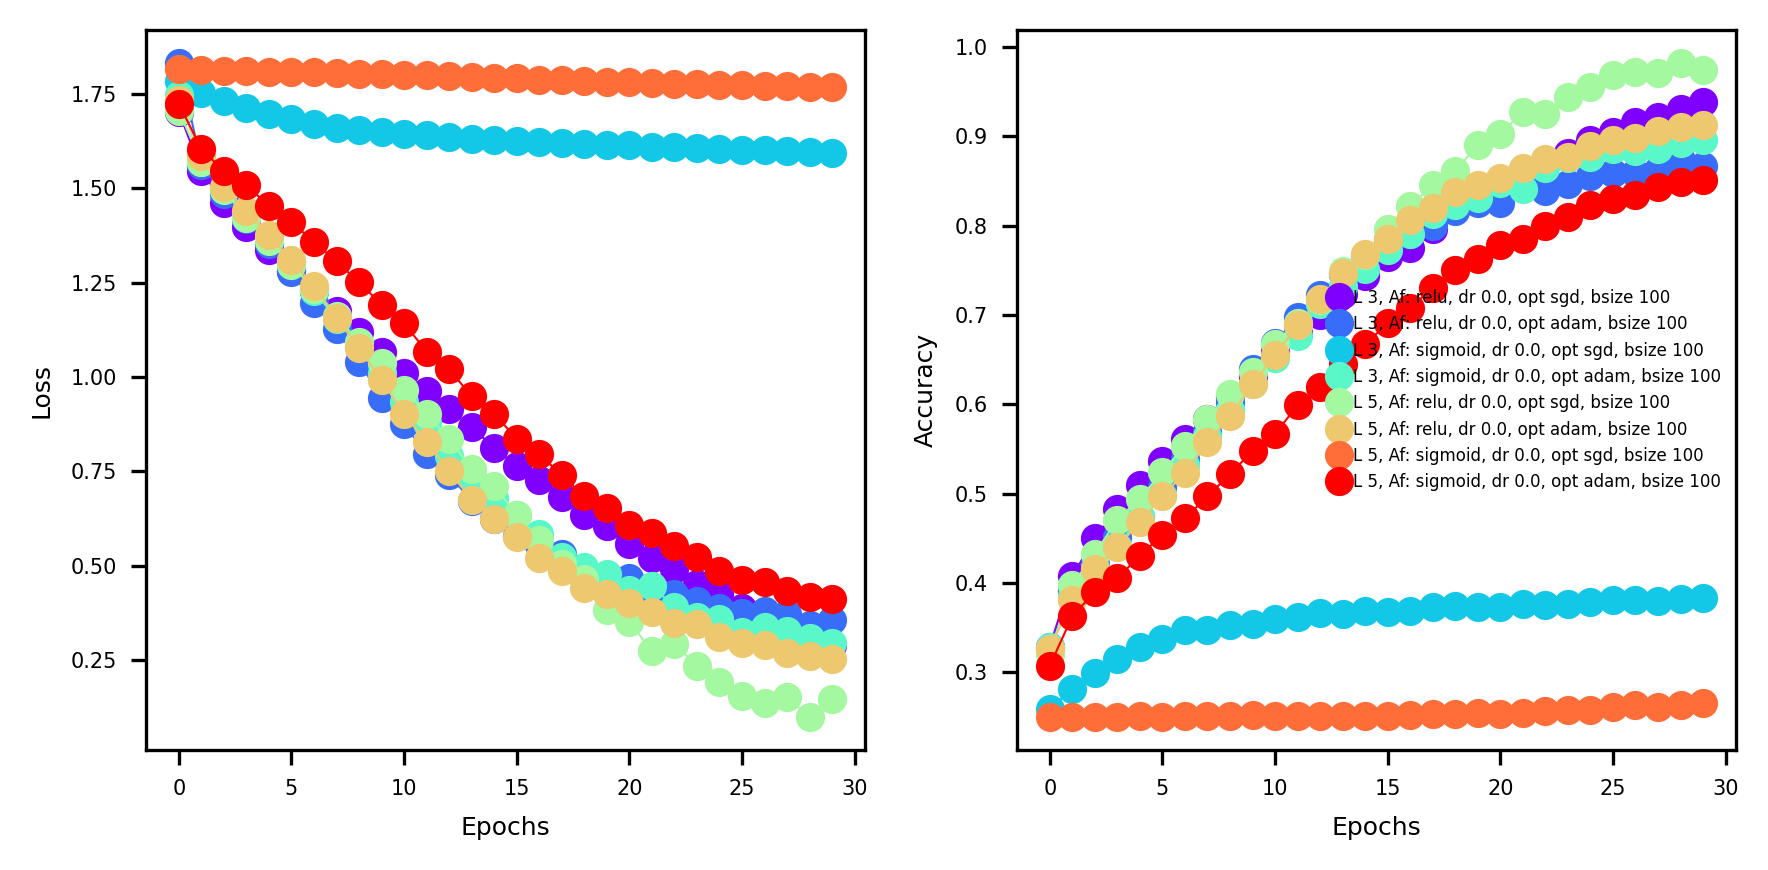

In [ ]:
# Create an FNN 
# parameters to vary
layers = [3,5]
actf = ['relu','sigmoid']
optimizer = ['sgd','adam']
dropout = [0.0]
epochs =[30]
batchsize = [100]
colors = cm.rainbow(np.linspace(0,1,2*2*2))
print ('Layers Actf dropout optimizer epochs batchsize TrainLoss TrainAcc ValLoss ValAcc TestLoss TestAcc TrainTime')
fig,ax = plt.subplots(1,2,figsize=[6,3],dpi=300)
best = 0
cnt = 0
for i,lay in enumerate(layers):
  nodes = np.linspace(48*48,7,lay).astype(int)
  for j,act in enumerate(actf):
    for k,dt in enumerate(dropout):
      for o,opt in enumerate(optimizer):
        for e,epoch in enumerate(epochs):
          for b,btsize in enumerate(batchsize):
            params.append('Layers: %s, Actf: %s, dropout rate: %s, optimizer: %s, epochs: %s, batchsize: %s'%(lay,act,dt,opt,epoch,btsize))
            model = Sequential()
            for l in np.arange(0,lay):
              if l==0:
                model.add(Dense(nodes[l],activation=act,input_shape=(48*48,),name='Input'))
              elif l==lay-1:
                model.add(Dense(nodes[l], activation='softmax',name='Output'))
              else:
                model.add(Dense(nodes[l],activation=act,name='H%s'%(l+1)))
                model.add(Dropout(dt))
            
            model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'],)
            start = time()
            history = model.fit(flatten_train_data, to_categorical(data.iloc[:,0]),epochs=epoch,batch_size=btsize,verbose=0)
            ttime = time()-start
            ax[0].plot(history.history['loss'],color=colors[cnt],marker='o',lw=0.5,label = 'L %s, Af: %s, dr %s, opt %s, bsize %s'%(lay,act,dt,opt,btsize))
            ax[1].plot(history.history['accuracy'],color=colors[cnt],marker='o',lw=0.5,label = 'L %s, Af: %s, dr %s, opt %s, bsize %s'%(lay,act,dt,opt,btsize))
            trainperf = model.evaluate(flatten_train_data, to_categorical(data.iloc[:,0]),verbose=0)
            valperf = model.evaluate(flatten_val_data, to_categorical(valdata.iloc[:,0]),verbose=0)
            testperf = model.evaluate(flatten_test_data, to_categorical(testdata.iloc[:,0]),verbose=0)
            print('%s %s %s %s %s %s %.3f %.3f %.3f %.3f %.3f %.3f %.3f'%(lay,act,dt,opt,epoch,btsize,trainperf[0],trainperf[1],valperf[0],valperf[1], testperf[0], testperf[1], ttime))
            if valperf[1]>best:
              bmodel = model
              best =  valperf[1]
              bestp = 'Layers: %s, Actf: %s, dropout rate: %s, optimizer: %s, epochs: %s, batchsize: %s'%(lay,act,dt,opt,epoch,btsize)
            cnt +=1

for i in range(2):
  axes = ax[i]
  axes.tick_params(labelsize=5)
  axes.set_xlabel('Epochs',fontsize=6)
  if i==0:
    axes.set_ylabel('Loss',fontsize=6)
  else:
    axes.set_ylabel('Accuracy',fontsize=6)
    axes.legend(loc='best',fontsize=4,frameon=False,handlelength=0)
plt.tight_layout()
plt.show()

I tested 8 different models above with varying # of layer, # of nodes, activation functions for nodes in the hidden layers and the optimization criteria (Stochastic Gradient Descent or ADAM). The following was the best model according to accuracy on the validation data set.  

In [ ]:
print (bestp)
print (best)

Layers: 5, Actf: relu, dropout rate: 0.0, optimizer: adam, epochs: 30, batchsize: 100
0.4697687327861786


The accuracy on the testing data set was around 46% and the total time taken to fit this model was ~89 seconds as shown in the table above (entry 6)

## Make a Convolutional Neural Network 

Layers Actf optimizer Ksize TrainLoss TrainAcc ValLoss ValAcc TestLoss TestAcc TrainTime
1 relu adam 3 0.034 0.990 4.307 0.492 4.074 0.491 142.933
3 sigmoid adam 6 1.810 0.251 1.812 0.249 1.816 0.245 145.740


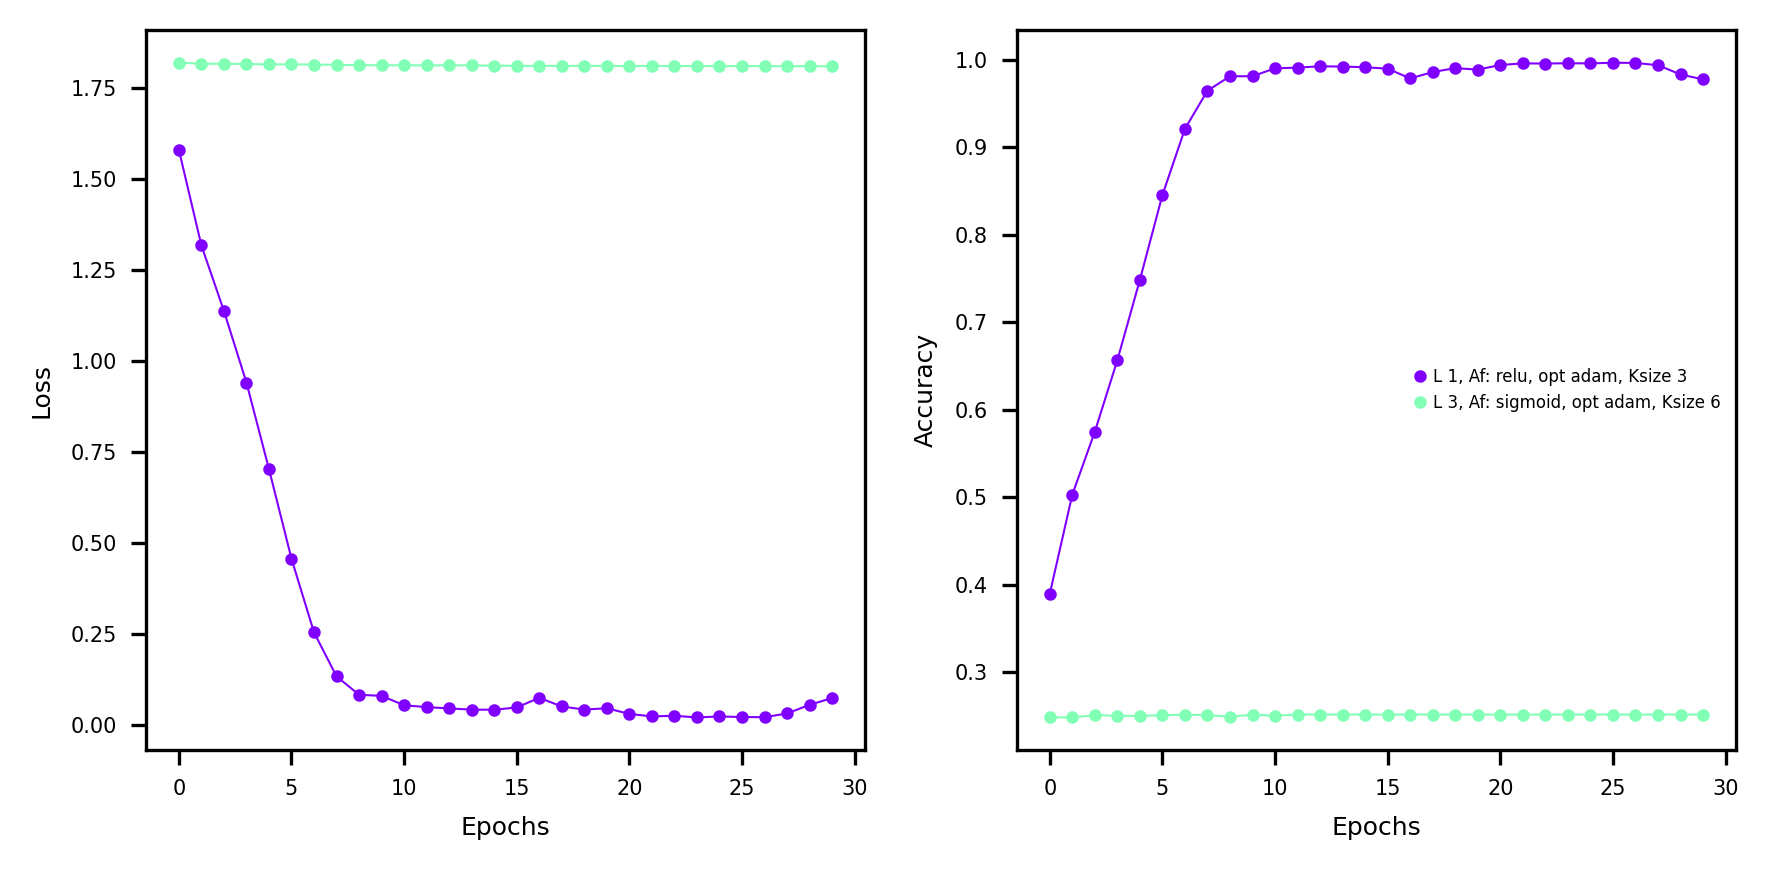

In [68]:
cnnlayers = [1,3]
actf = ['relu','sigmoid','tanh']
optimizer = ['adam','adam','sgd']
ksize = [3,6,12]
epochs =[30]
batchsize = [100]
cnntrain  = flatten_train_data.reshape(len(flatten_train_data),48,48,1)
cnntest = flatten_test_data.reshape(len(flatten_test_data),48,48,1)
cnnval = flatten_val_data.reshape(len(flatten_val_data),48,48,1)
colors = cm.rainbow(np.linspace(0,1,3))
print ('Layers Actf optimizer Ksize TrainLoss TrainAcc ValLoss ValAcc TestLoss TestAcc TrainTime')
fig,ax = plt.subplots(1,2,figsize=[6,3],dpi=300)
best = 0
cnt = 0
for i,lay in enumerate(cnnlayers):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=3, activation=actf[i], input_shape=(48,48,1)))
  for l in range(lay):
    if l%2==0:
      model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32*(l+1), kernel_size=ksize[i], activation=actf[i]))
    
  model.add(Flatten())
  model.add(Dense(200, activation=actf[i]))
  model.add(Dense(7, activation='softmax'))
  model.compile(optimizer=optimizer[i],loss='categorical_crossentropy',metrics=['accuracy'],)
  start = time()
  history = model.fit(cnntrain, to_categorical(data.iloc[:,0]),epochs=epochs[0],batch_size=batchsize[0],verbose=0)
  ttime = time()-start
  ax[0].plot(history.history['loss'],color=colors[cnt],marker='o',ms=2,lw=0.5,label = 'L %s, Af: %s, opt %s, Ksize %s'%(lay,actf[i],optimizer[i],ksize[i]))
  ax[1].plot(history.history['accuracy'],color=colors[cnt],marker='o',ms=2,lw=0.5,label = 'L %s, Af: %s, opt %s, Ksize %s'%(lay,actf[i],optimizer[i],ksize[i]))
  trainperf = model.evaluate(cnntrain, to_categorical(data.iloc[:,0]),verbose=0)
  valperf = model.evaluate(cnnval, to_categorical(valdata.iloc[:,0]),verbose=0)
  testperf = model.evaluate(cnntest, to_categorical(testdata.iloc[:,0]),verbose=0)
  print('%s %s %s %s %.3f %.3f %.3f %.3f %.3f %.3f %.3f'%(lay,actf[i],optimizer[i],ksize[i],trainperf[0],trainperf[1],valperf[0],valperf[1], testperf[0], testperf[1], ttime))
  if valperf[1]>best:
    bmodel = model
    best =  valperf[1]
    bestp = 'Layers: %s, Actf: %s, optimizer: %s, Ksize: %s'%(lay,actf[i],optimizer[i],ksize[i])
    cnt +=1
for i in range(2):
  axes = ax[i]
  axes.tick_params(labelsize=5)
  axes.set_xlabel('Epochs',fontsize=6)
  if i==0:
    axes.set_ylabel('Loss',fontsize=6)
  else:
    axes.set_ylabel('Accuracy',fontsize=6)
    axes.legend(loc='best',fontsize=4,frameon=False,handlelength=0)
plt.tight_layout()
plt.show()



Using only one convolutional layer one of the CNN models I trained gave me ~49% accuracy on the testing data set but the model training time was almost double (140 seconds) of the best performing FNN models (89 seconds) in the previous section.  

## Hyper parameter optimization

In [77]:
def optimize_cnn(hyperparameter): 
  common_features = [Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu', input_shape=(48,48,1)), 
                   Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='tanh'), 
                   MaxPooling2D(pool_size=(2,2)),
                   Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='sigmoid'),
                   Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
                   MaxPooling2D(pool_size=(2,2)), Flatten(),]
  classifier = [Dense(200, activation='relu'), Dense(7, activation='softmax'),]
  
  cnn_model = Sequential(common_features+classifier)
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)

  _ = cnn_model.fit(cnntrain,to_categorical(data.iloc[:,0]), epochs=10, batch_size=100, verbose=0)
  performance = cnn_model.evaluate(cnntest,to_categorical(testdata.iloc[:,0]), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})
  


space = {
    'conv_kernel_size': hp.choice('conv_kernel_size', [2,3]),
    #'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=5,
    )

print("==================================")
print("Best Hyperparameters", best)


test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(testdata, to_categorical(testdata.iloc[:,0]))

print("==================================")
print("Test Accuracy: ", performance[1])
        

Hyperparameters: 
{'conv_kernel_size': 3, 'optimizer': 'Adam'}
Accuracy: 
0.500417947769165
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 3, 'optimizer': 'Adam'}
Accuracy: 
0.5121203660964966
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 3, 'optimizer': 'sgd'}
Accuracy: 
0.35358038544654846
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 2, 'optimizer': 'Adam'}
Accuracy: 
0.5032042264938354
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 1, 'optimizer': 'Adam'}
Accuracy: 
0.442741721868515
----------------------------------------------------
100%|██████████| 5/5 [09:43<00:00, 116.62s/it, best loss: -0.5121203660964966]
Best Hyperparameters {'conv_kernel_size': 2, 'optimizer': 0}


ValueError: ignored

I used hyperopt with 2 hyperparameters being varied to find the optimum (Optimizer function: either SGD or ADAM and convolutional kernel size). The optimum from the values I had provided was kernel size = 2 with the ADAM optimizer giving me a 50% accuracy on the test data set. 

## Fine tuning the CNN using a pretrained CNN (VGG16)

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
base_model = VGG16(input_shape=(48,48,3),
                   include_top=False,
                   weights='imagenet')
for layer in base_model.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [11]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(7, activation='softmax')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',metrics = ['acc'])


In [14]:
# Change the input data to (48,48,3) as VGG is built on RGG data 
rgbtrain = np.repeat(np.array(images)[...,np.newaxis],3,-1)
print (rgbtrain.shape)
rgbtest = np.repeat(np.array(testimages)[...,np.newaxis],3,-1)
print(rgbtest.shape)
rgbval = np.repeat(np.array(valimages)[...,np.newaxis],3,-1)
print(rgbval.shape)

(28709, 48, 48, 3)
(3589, 48, 48, 3)
(3589, 48, 48, 3)


In [ ]:
vgghist = model.fit(rgbtrain, to_categorical(data.iloc[:,0]),epochs=10,steps_per_epoch=50,verbose=0)

In [ ]:
# Evaluate model performance 
print ('Evaluating model performance on test...')
performance = model.evaluate(rgbtest, to_categorical(testdata.iloc[:,0]))
print ('Evaluating model performance on test...Ok')

print ('Evaluating model performance on validation...')
performance = model.evaluate(rgbval, to_categorical(valdata.iloc[:,0]))
print ('Evaluating model performance on validation...Ok')

Evaluating model performance on test...
113/113 [==============================] - 5s 30ms/step - loss: 1.5955 - acc: 0.3812
Evaluating model performance on test...Ok
Evaluating model performance on validation...
113/113 [==============================] - 3s 27ms/step - loss: 1.5833 - acc: 0.3840
Evaluating model performance on validation...Ok


I used the VGG16 pretrained CNN and only modified the additional last few layers to get better accuracy with my data set. 

## Augment data with various operations on given data set

Keras has multiple filters which can modify given image data with physical transformations like zooming in/out, cropping or rotating to increase the dataset size with other possible entries

(-0.5, 47.5, 47.5, -0.5)

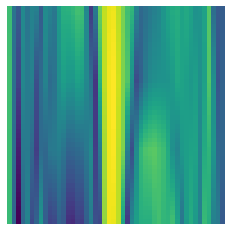

In [13]:
import matplotlib.pyplot as plt
data_augmentation = tf.keras.Sequential([
  layers.RandomRotation(0.8),
  layers.RandomFlip("horizontal_and_vertical"),  
])
pixels = data["pixels"]
emotion = data["emotion"]
image = tf.constant(list(np.float_(pixels[1].split())), shape=[48,48])
image = tf.expand_dims(image, 0)
plt.figure()
augmented_image = data_augmentation(image)
plt.imshow(augmented_image[0])
plt.axis("off")

In [17]:

!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF "/content/drive/MyDrive/HW3/HW3.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

Layers Actf dropout optimizer epochs batchsize TrainLoss TrainAcc ValLoss ValAcc TestLoss TestAcc TrainTime
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 2304)              5310720   
                                                                 
 H2 (Dense)                  (None, 1155)              2662275   
                                                                 
 dropout_2 (Dropout)         (None, 1155)              0         
                                                                 
Total params: 7,972,995
Trainable params: 7,972,995
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 2304)

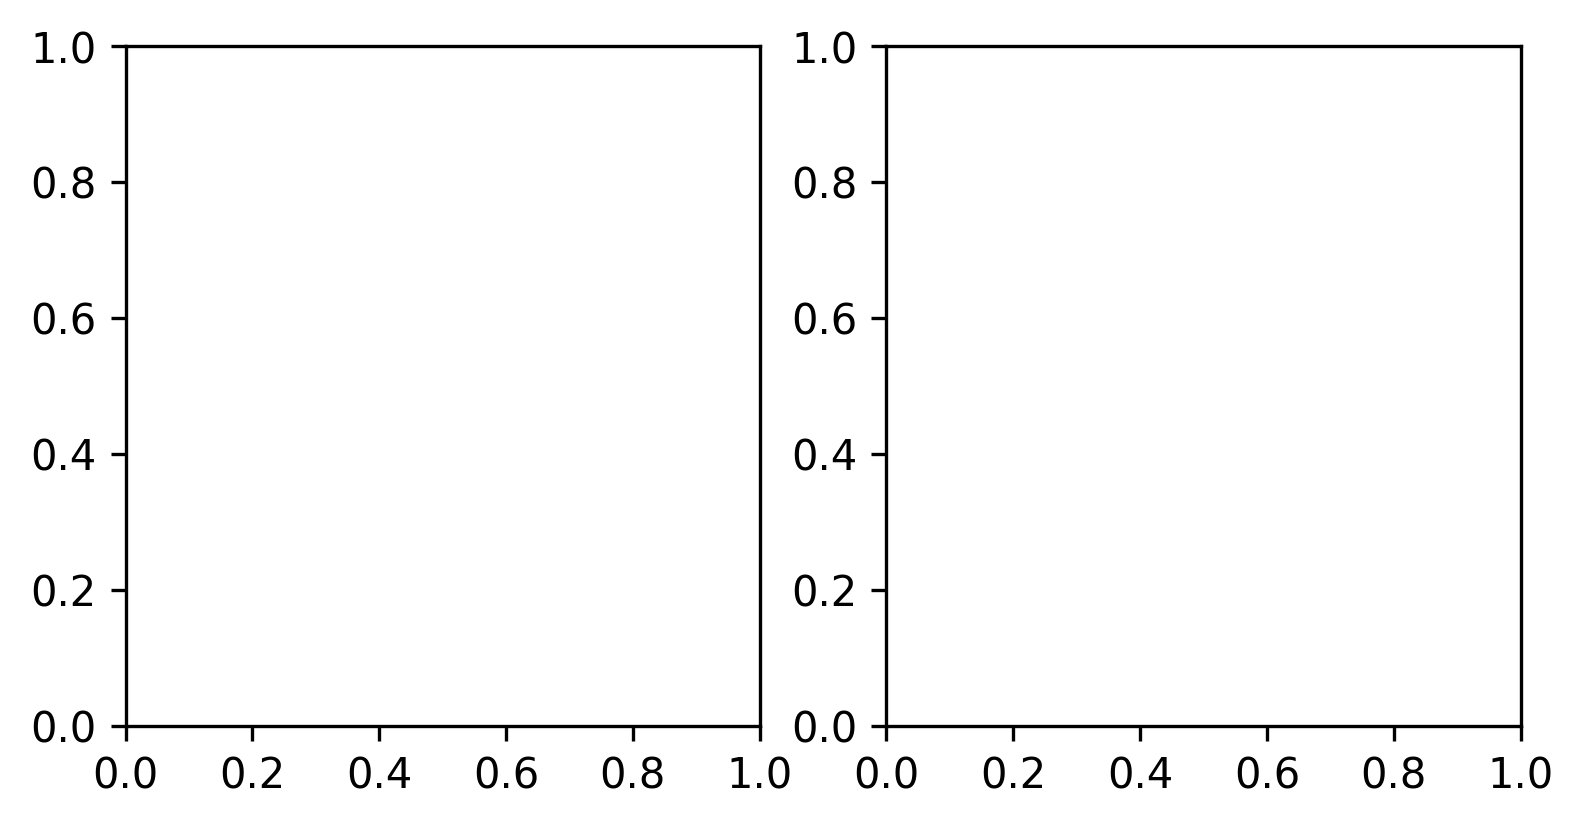

In [20]:
# Create an FNN 
# parameters to vary
layers = [3,5]
actf = ['relu','sigmoid']
optimizer = ['sgd','adam']
dropout = [0.0]
epochs =[30]
batchsize = [100]
print ('Layers Actf dropout optimizer epochs batchsize TrainLoss TrainAcc ValLoss ValAcc TestLoss TestAcc TrainTime')
fig,ax = plt.subplots(1,2,figsize=[6,3],dpi=300)
best = 0
cnt = 0
for i,lay in enumerate(layers):
  nodes = np.linspace(48*48,7,lay).astype(int)
  for j,act in enumerate(actf):
    for k,dt in enumerate(dropout):
      for o,opt in enumerate(optimizer):
        for e,epoch in enumerate(epochs):
          for b,btsize in enumerate(batchsize):
           
            model = Sequential()
            for l in np.arange(0,lay):
              if l==0:
                model.add(Dense(nodes[l],activation=act,input_shape=(48*48,),name='Input'))
              elif l==lay-1:
                model.add(Dense(nodes[l], activation='softmax',name='Output'))
              else:
                model.add(Dense(nodes[l],activation=act,name='H%s'%(l+1)))
                model.add(Dropout(dt))
                print (model.summary())